# The footprint of a letter

## Introduction

You are provided with this model below.

In [ ]:
# You need Pytorch for this!
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# As long as you are on version 2.x of Pytorch, you'll be fine!
torch.__version__

'2.9.0+cu126'

In [ ]:
# Do you know why it is important that this seed is fixed?
# Google or ask an LLM assistant if you don't! :)
torch.manual_seed(42)

In [ ]:
class SimpleNet(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super().__init__()

        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

        # Specific weight initialization
        self._initialize_weights()

    def _initialize_weights(self):
        # Initialize weights with random values
        nn.init.normal_(self.fc1.weight, mean=0.0, std=0.02)
        nn.init.normal_(self.fc2.weight, mean=0.0, std=0.02)

        # Initialize biases to zero
        nn.init.constant_(self.fc1.bias, 0.0)
        nn.init.constant_(self.fc2.bias, 0.0)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
model = SimpleNet(input_size=26, hidden_size=64, output_size=50).to("cpu")

Notice how the input size is 26. This is entirely by design, such that each element of the input corresponds with each letter of the alphabet.

You are also provided with this list of vectors below.

In [ ]:
footprint1 = torch.FloatTensor([
    -0.0293, -0.1092, -0.0290,  0.0885,  0.0623, -0.1106, -0.0229,  0.1987,
    -0.1062,  0.1949, -0.0279,  0.0705, -0.2228, -0.0478, -0.1745,  0.1071,
    -0.0549,  0.1062,  0.1074, -0.0229, -0.1208, -0.0866, -0.1071, -0.0919,
     0.1597,  0.1101,  0.0335,  0.0424, -0.1154,  0.0375,  0.0545, -0.2223,
    -0.0270, -0.0340,  0.0261,  0.1256,  0.0372, -0.0898, -0.1757,  0.1671,
    -0.1561,  0.0908,  0.0166, -0.0705, -0.0078, -0.0120, -0.0082, -0.0245,
    -0.1756, -0.0689
])

In [ ]:
footprint2 = torch.FloatTensor([
    -0.1702, -0.2287, -0.0547, 0.0448, 0.2204, 0.0330, -0.1223, 0.0966,
    -0.0118, -0.0911, 0.1477, 0.1065, -0.3109, -0.0817, -0.0824, 0.1230,
    0.1757, 0.1231, -0.0162, -0.1775, -0.1278, -0.1683, 0.1159, 0.1903,
    -0.0053, 0.0484, -0.0476, 0.0044, -0.0514, -0.1619, -0.0399, 0.0002,
    0.0555, -0.2482, -0.0462, -0.4026, -0.0799, -0.3325, -0.0719, 0.2053,
    0.0951, 0.2918, -0.0194, -0.0637, -0.1995, 0.1005, -0.0509, -0.0357,
    -0.2760, -0.1030
])

In [ ]:
footprint3 = torch.FloatTensor([
    -0.1158, -0.2736, -0.1917,  0.1027, -0.0901,  0.3210, -0.1885,  0.1472,
     0.1963, -0.1349, -0.2345,  0.5342, -0.2488,  0.2003, -0.0306, -0.1891,
     0.1288,  0.2327,  0.0963, -0.1089, -0.2410,  0.1069, -0.1464, -0.2085,
     0.0420,  0.1267, -0.1581, -0.0614,  0.0604,  0.0312, -0.2559,  0.0039,
     0.3445, -0.0059,  0.0890, -0.0916,  0.1148,  0.0775,  0.0633,  0.1515,
    -0.1137,  0.0521, -0.0418,  0.0388, -0.0424,  0.0375, -0.0586,  0.0932,
    -0.0640, -0.1933
])

In [ ]:
footprint4 = torch.FloatTensor([
    0.2047, -0.2309, -0.2069, -0.3843,  0.0616, -0.0781,  0.1256,  0.2333,
    -0.0234, -0.0146, -0.3804,  0.3934, -0.1173, -0.2266, -0.2054,  0.0861,
    -0.0513,  0.1966,  0.1906,  0.0125, -0.3607, -0.2924, -0.0591, -0.3109,
     0.3125,  0.4452, -0.1773, -0.1590, -0.2283, -0.0456, -0.0041, -0.0896,
     0.1555, -0.1307,  0.2646, -0.1352,  0.1714,  0.0815,  0.3392, -0.2495,
     0.2008, -0.0400,  0.0700, -0.1225, -0.3702, -0.2685,  0.0006, -0.2181,
    -0.0386, -0.4234
])

Each vector corresponds to outputs of the network when specific letters are passed through the network. The network takes in letters by accepting a 26-dim vector that is all zeros save for the $i^{th}$ position having a non-zero value, representing the $i^{th}$ letter in the alphabet.

These letters left nothing behind aside from these "footprints".

## Your task

Find the four letters that led to the "footprints" above. Make sure your letters are all lowercase and combined into a single string.

- 2 pts for finding the four correct letters
- 2 pts if (a) your answer is correct, and (b) your notebook submission demonstrates a method that shows clear logical reasoning with verifiable steps.
- 3 pts if (a) your answer is correct, and (b) your notebook submission shows your method will still have similar runtime even if the number of characters in the alphabet is increased to 10,000.
- 3 pts if (a) your answer is correct, and (b) you can find the numerical values used to represent the letters in the first place! Get within +/-5% for your answers to count.
- Partial credit to be given at discretion

In [ ]:
# Your work below :)

# Brute force approach

In [ ]:
outs = []
for i in range(26):
    x = torch.zeros(size=(26,))
    x[i] = 1
    out = model(x)
    outs.append(out)

In [ ]:
reference_outs = [footprint1, footprint2, footprint3, footprint4]

In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
for footprint in reference_outs:
    with torch.no_grad():
        dists = torch.FloatTensor([loss_fn(i, footprint) for i in outs])

    print(dists)
    print(torch.argmin(dists))

tensor([0.0112, 0.0110, 0.0111, 0.0112, 0.0111, 0.0111, 0.0112, 0.0111, 0.0111,
        0.0110, 0.0110, 0.0111, 0.0111, 0.0112, 0.0107, 0.0110, 0.0110, 0.0110,
        0.0110, 0.0111, 0.0111, 0.0110, 0.0109, 0.0111, 0.0109, 0.0110])
tensor(14)
tensor([0.0232, 0.0232, 0.0232, 0.0230, 0.0230, 0.0232, 0.0230, 0.0232, 0.0226,
        0.0230, 0.0230, 0.0231, 0.0232, 0.0230, 0.0231, 0.0231, 0.0230, 0.0229,
        0.0229, 0.0231, 0.0231, 0.0231, 0.0231, 0.0229, 0.0228, 0.0231])
tensor(8)
tensor([0.0281, 0.0284, 0.0286, 0.0288, 0.0284, 0.0287, 0.0286, 0.0284, 0.0286,
        0.0283, 0.0286, 0.0285, 0.0285, 0.0286, 0.0286, 0.0286, 0.0286, 0.0285,
        0.0286, 0.0286, 0.0284, 0.0285, 0.0284, 0.0282, 0.0286, 0.0286])
tensor(0)
tensor([0.0483, 0.0483, 0.0483, 0.0484, 0.0484, 0.0484, 0.0483, 0.0481, 0.0484,
        0.0484, 0.0483, 0.0483, 0.0477, 0.0485, 0.0483, 0.0486, 0.0482, 0.0484,
        0.0480, 0.0484, 0.0483, 0.0482, 0.0482, 0.0482, 0.0482, 0.0482])
tensor(12)


In [ ]:
int2letters = dict(zip(
    range(26),
    "abcdefghijklmnopqrstuvwxyz"
))

In [ ]:
for i in [14, 8, 0, 12]:
    print(int2letters.get(i))

o
i
a
m


In [ ]:
o_1 = torch.zeros(size=(26,))
o_1[14] = 1

o_2 = torch.zeros(size=(26,))
o_2[14] = 0.1

o_3 = torch.zeros(size=(26,))
o_3[14] = 10

In [ ]:
for i in [o_1, o_2, o_3]:
    with torch.no_grad():
        out = model(i)
        print(loss_fn(out, footprint1))

tensor(0.0107)
tensor(0.0112)
tensor(0.0063)


In [ ]:
xs = torch.logspace(-2, 2, steps=10)

In [ ]:
losses = []
for i in xs:
    o_tensor = torch.zeros(size=(26,))
    o_tensor[14] = i
    with torch.no_grad():
        out = model(o_tensor)
        losses.append(loss_fn(out, footprint1))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

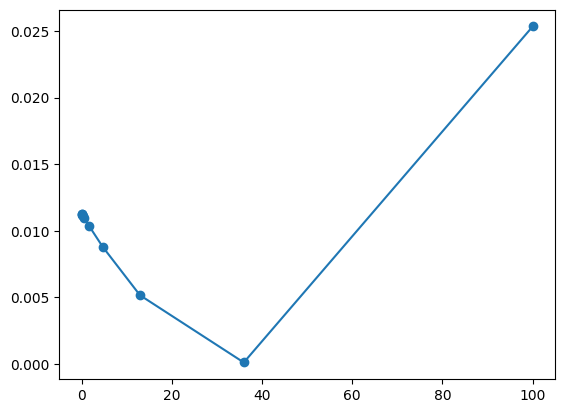

In [ ]:
plt.plot(xs, losses, marker="o")

In [ ]:
torch.argmin(torch.FloatTensor(losses))

tensor(8)

In [ ]:
xs[8]

tensor(35.9381)

## Optimize it a bit

In [ ]:
in_tensor = nn.Parameter(data=torch.randn(size=(26,)))
optimizer = torch.optim.Adam(params=[in_tensor], lr=5e-1)

In [ ]:
metrics = []
for i in range(5_000):
    out = model(in_tensor)
    loss = loss_fn(out, footprint1)

    metrics.append(loss.item())

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

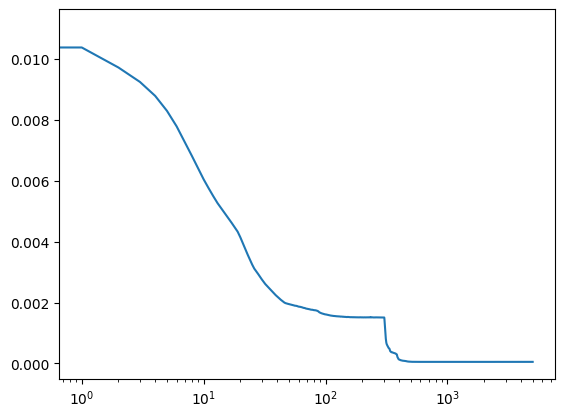

In [ ]:
plt.semilogx(metrics)

In [ ]:
with torch.no_grad():
    final_out = model(in_tensor)

In [ ]:
final_out[:10], footprint1[:10]

(tensor([-0.0336, -0.1192, -0.0382,  0.0886,  0.0628, -0.1093, -0.0196,  0.2017,
         -0.1008,  0.1944]),
 tensor([-0.0293, -0.1092, -0.0290,  0.0885,  0.0623, -0.1106, -0.0229,  0.1987,
         -0.1062,  0.1949]))

In [ ]:
in_tensor

Parameter containing:
tensor([ 0.6030, -2.1830,  2.2020,  3.4393,  0.5322,  4.4024, -0.2188, -0.5246,
        -1.3633,  3.8434,  1.7323,  0.1504, -0.8792, -0.5532, 37.7873,  4.2555,
        -0.2263,  1.4546,  1.1547, -3.3616, -2.9972,  0.0712,  2.2130,  0.9510,
        -2.2329,  0.0785], requires_grad=True)

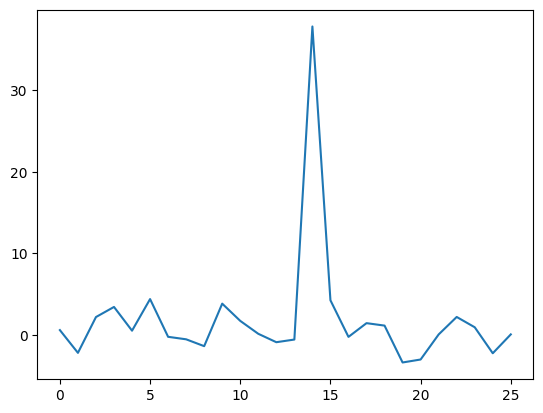

In [ ]:
plt.plot(in_tensor.detach().numpy())

In [ ]:
metrics[-1]

5.157773557584733e-05

---

In [ ]:
in_param = nn.Parameter(data=torch.randn(size=(1,)))
mask = torch.zeros(size=(26,))
mask[14] = 1.0

optimizer = torch.optim.Adam(params=[in_param], lr=2e-1)

In [ ]:
metrics = []
for i in range(5_000):
    in_tensor = in_param * mask
    out = model(in_tensor)
    loss = loss_fn(out, footprint1)

    metrics.append(loss.item())

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

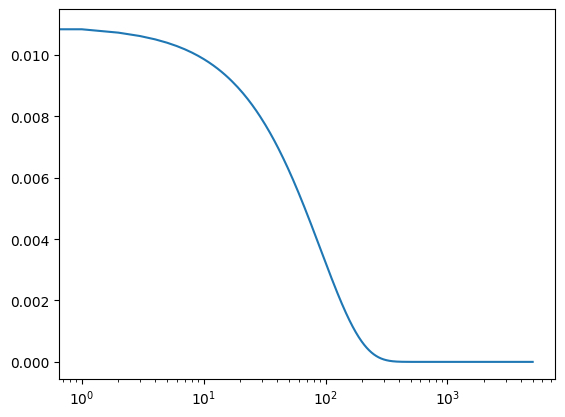

In [ ]:
plt.semilogx(metrics)

In [ ]:
with torch.no_grad():
    final_out = model(in_tensor)

In [ ]:
final_out[:10], footprint1[:10]

(tensor([-0.0293, -0.1093, -0.0290,  0.0885,  0.0623, -0.1106, -0.0229,  0.1987,
         -0.1062,  0.1949]),
 tensor([-0.0293, -0.1092, -0.0290,  0.0885,  0.0623, -0.1106, -0.0229,  0.1987,
         -0.1062,  0.1949]))

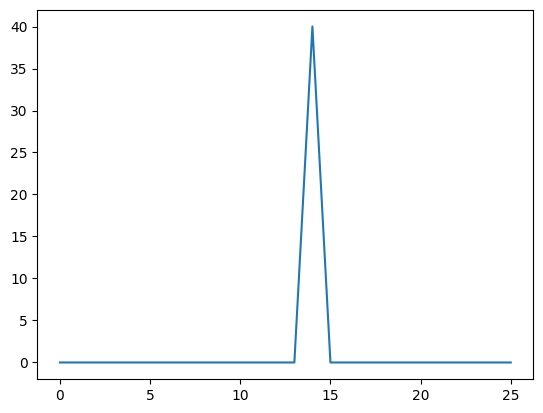

In [ ]:
plt.plot(in_tensor.detach().numpy())

In [ ]:
torch.max(in_tensor)

tensor(40.0040, grad_fn=<MaxBackward1>)

In [ ]:
for idx, footprint in zip([14, 8, 0, 12], reference_outs):
    in_param = nn.Parameter(data=torch.randn(size=(1,)))
    mask = torch.zeros(size=(26,))
    mask[idx] = 1.0

    optimizer = torch.optim.Adam(params=[in_param], lr=2e-1)

    metrics = []
    for i in range(5_000):
        in_tensor = in_param * mask
        out = model(in_tensor)
        loss = loss_fn(out, footprint)

        metrics.append(loss.item())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(idx, torch.max(in_tensor))

14 tensor(40.0040, grad_fn=<MaxBackward1>)
8 tensor(59.9987, grad_fn=<MaxBackward1>)
0 tensor(79.9985, grad_fn=<MaxBackward1>)
12 tensor(99.9999, grad_fn=<MaxBackward1>)


## Alternative solution (!)

In [ ]:
model

SimpleNet(
  (fc1): Linear(in_features=26, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=50, bias=True)
)

h = W1 * x

z = max(0, h)

y = W2 * z

---

z = W2^-1 * y

h ~= z

x = W1^-1 * h

In [ ]:
W1_pinv = torch.linalg.pinv(model.fc1.weight)
W2_pinv = torch.linalg.pinv(model.fc2.weight)

In [ ]:
z = torch.matmul(W2_pinv, footprint1)

In [ ]:
x = torch.matmul(W1_pinv, z)

In [ ]:
torch.argmax(x), torch.max(x)

(tensor(14), tensor(18.3783, grad_fn=<MaxBackward1>))

In [ ]:
for y in reference_outs:
    z = torch.matmul(W2_pinv, y)
    x = torch.matmul(W1_pinv, z)
    print(torch.argmax(x))

tensor(14)
tensor(8)
tensor(0)
tensor(12)
